# Pict of the day - SOLUCIÓN
### Obtener la imagen astronómica del día

El objetivo de esta práctica es recuperar la imagen astronómica del día para varias fechas usando el API de la NASA:

        https://api.nasa.gov/?search=APOD#browseAPI

El procedimiento normal sería generar una clave de acceso (API key) en el apartado: https://api.nasa.gov/?search=APOD#signUp
Pero en esta ocasión, ya hemos realizado ese trámite y generado la siguiente API key para esta práctica: 

        apikey="lx81PWlSB3UK8oUu3zb2tPn4a30PQf1iEFzL7Psj"

Con esta API key se puede acceder a la imagen astronómica del día construyendo una URL como la siguiente:

        https://api.nasa.gov/planetary/apod?date=2019-11-01&api_key=lx81PWlSB3UK8oUu3zb2tPn4a30PQf1iEFzL7Psj

Se recomienda que el alumno la copie en un navegador para ver el resultado. 

En la URL anterior hay un campo para el API key ("api_key=lx81PWlSB3UK8oUu3zb2tPn4a30PQf1iEFzL7Psj") que es constante y un campo para la fecha ("date=2019-11-01") que permite seleccionar imágenes de días pasados.

Cuando se realiza esta llamada al API de la NASA con la URL corresponidente, el resultado es un JSON con varios campos entre los que se encuentran el título de la imagen y una URL con un enlace a la imagen del día. El alumno deberá recuperar esa URL para visualizarla en el notebook de python. Para ello puede hacer uso del siguiente código:

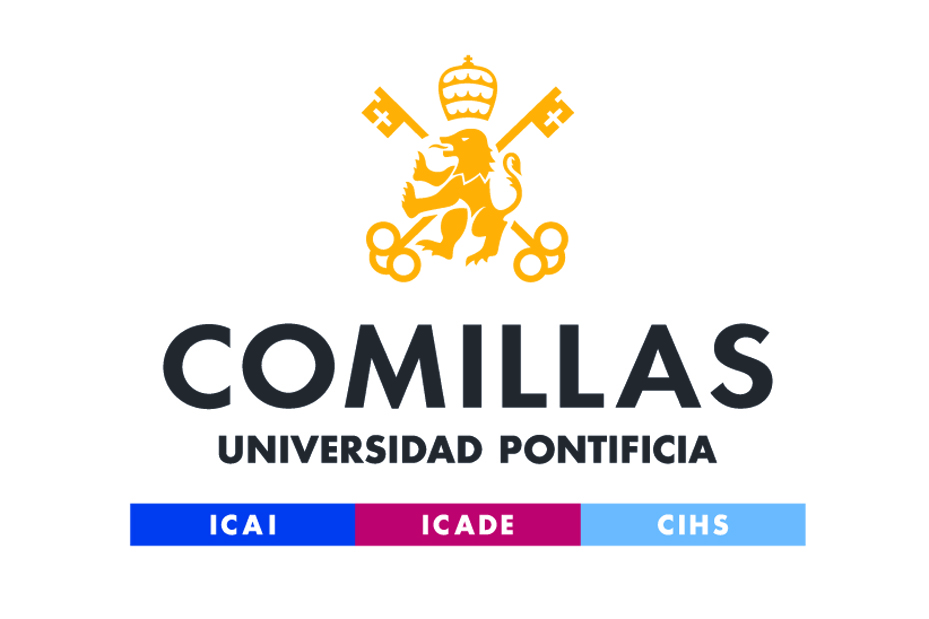

In [42]:
from IPython.display import Image
from IPython.display import display

display(Image("https://www.comillas.edu/images/Noticias/Curso_2017_18/Julio_18/FOTO_LOGO_REPORTAJE_WEB.jpg", width = 250))

El alumno deberá sustituir la URL del ejemplo por la url de la imagen del día recuperada del JSON devuelto por el API de la NASA.

Las imágenes del día que queremos recuperar se corresponden con las fechas del fichero "fechas.csv". Este fichero contiene una tabla con varios elementos entre los que se encuentra una columna para el año, otro para el mes y otro para el día y que el alumno deberá utilizar para construir la URL de consulta al API de la NASA.


En resumen, el procedimiento es el siguiente:

1. Leer el fichero "fechas.csv" y extraer todas las fechas en formato STRING con esta construcción "YYYY-MM-DD"
2. Construir una URL de consulta al API de la NASA para cada fecha
3. Hacer una request al API de NASA como hemos hecho en las sesiones de teoría
4. Parsear el objeto JSON devuelto para construir un diccionario
5. Recuperar el título y la URL de la imagen del día
6. Imprimir el título y visualizar la imagen del día para todas las fechas del fichero "fechas.csv"


## Solución:

#### Obtener las fechas del archivo
#### Solución

In [13]:
fechas=[]
with open("fechas.csv","r") as file:
    header=file.readline()
    for row in file:
        year=row.split("^")[1]
        month=row.split("^")[2]
        day=row.split("^")[3]
        fechas.append(year+"-"+month+"-"+day)

In [14]:
print(fechas)

['2017-10-28', '2019-1-17', '2018-11-6', '2019-1-15', '2018-9-15', '2019-10-10', '2018-3-27', '2019-11-4', '2018-12-9', '2015-8-14']


#### Obtener fotos del día
#### Solución

Fecha:  2017-10-28
Title:  NGC 6369: The Little Ghost Nebula


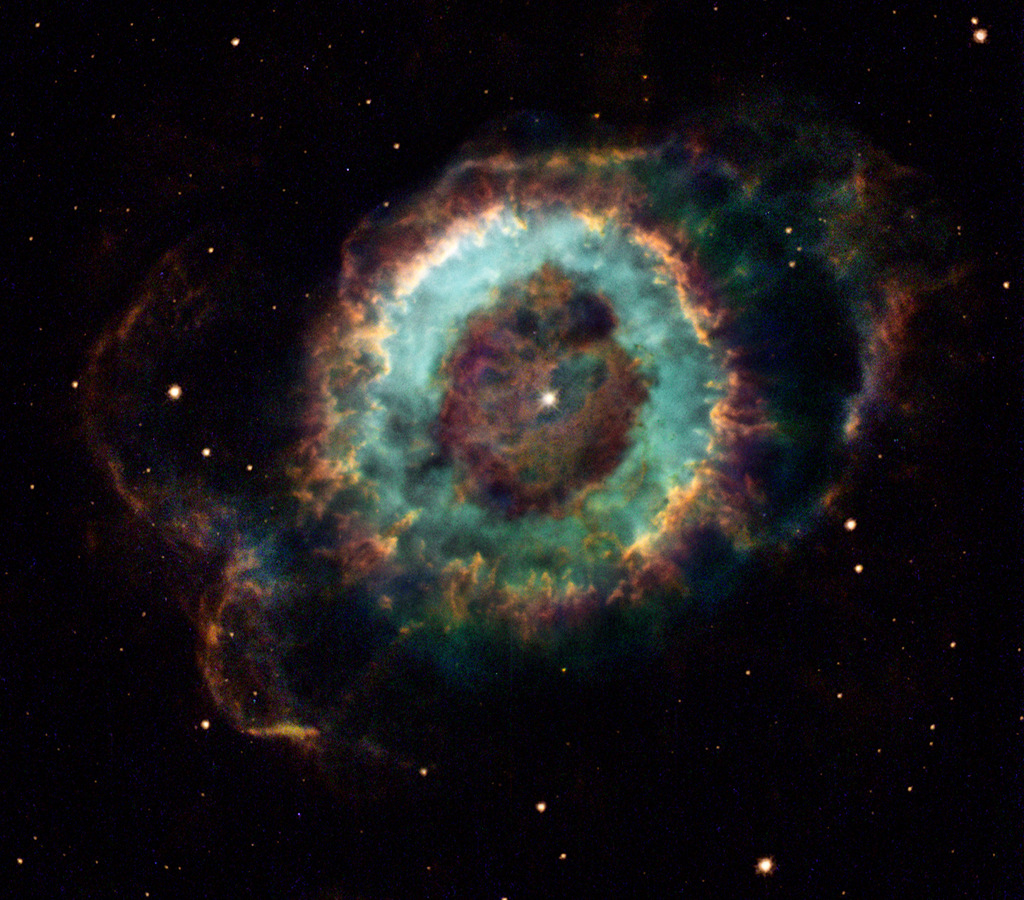

Fecha:  2019-1-17
Title:  Cabin under the Stars


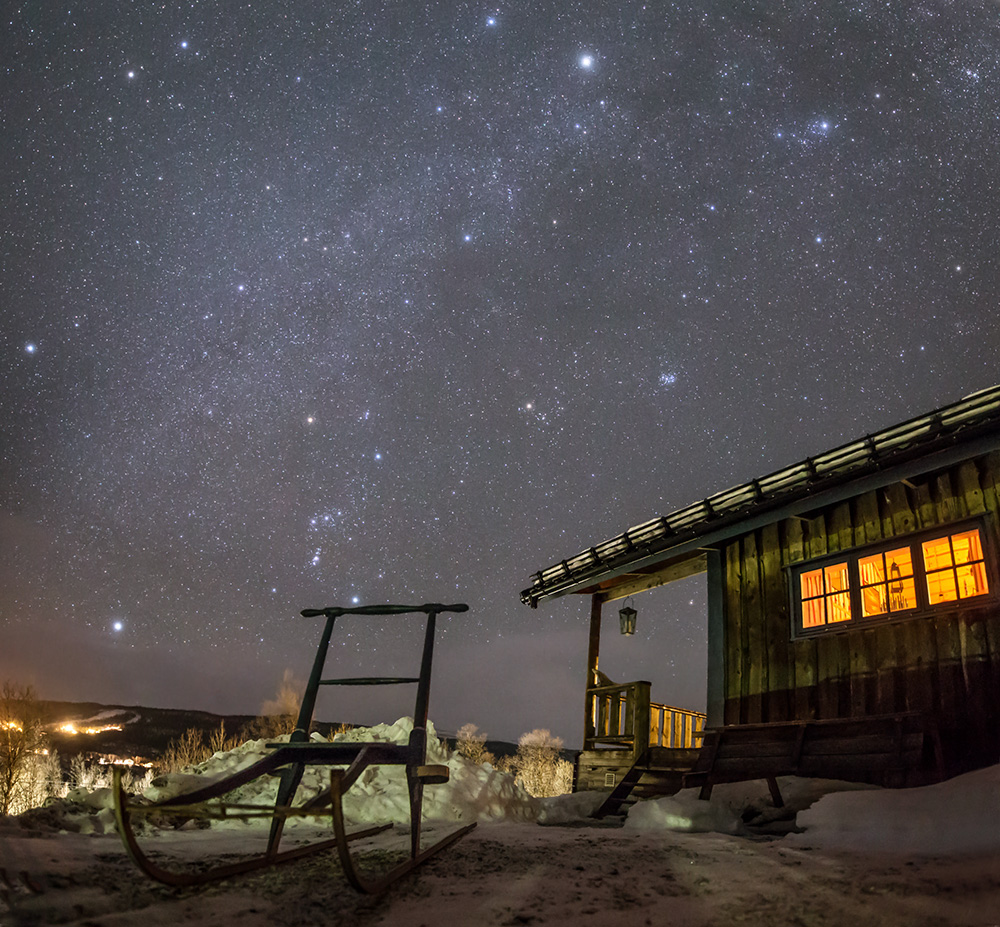

Fecha:  2018-11-6
Title:  NGC 1499: The California Nebula


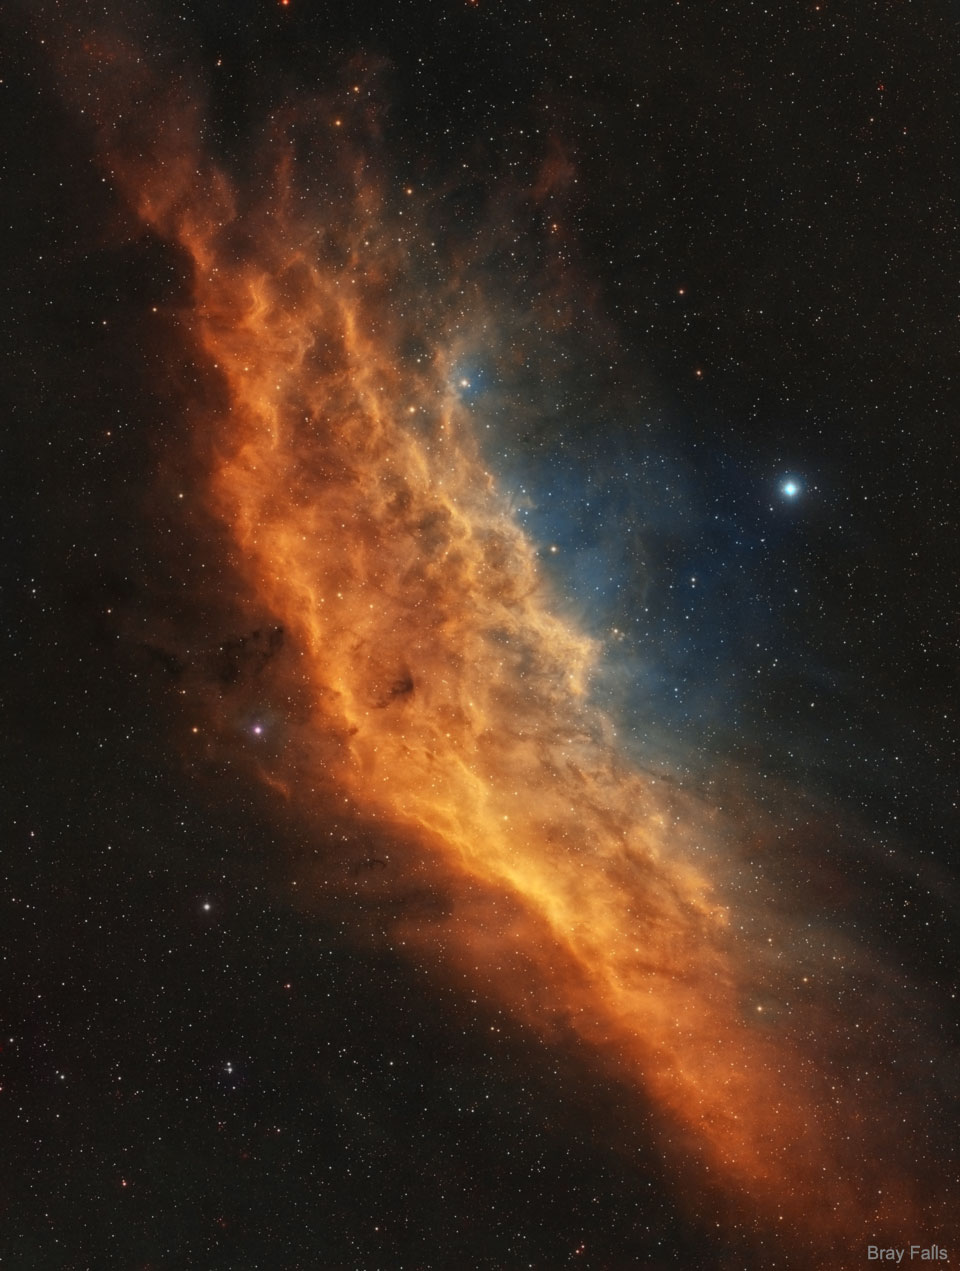

Fecha:  2019-1-15
Title:  The Heart and Soul Nebulas


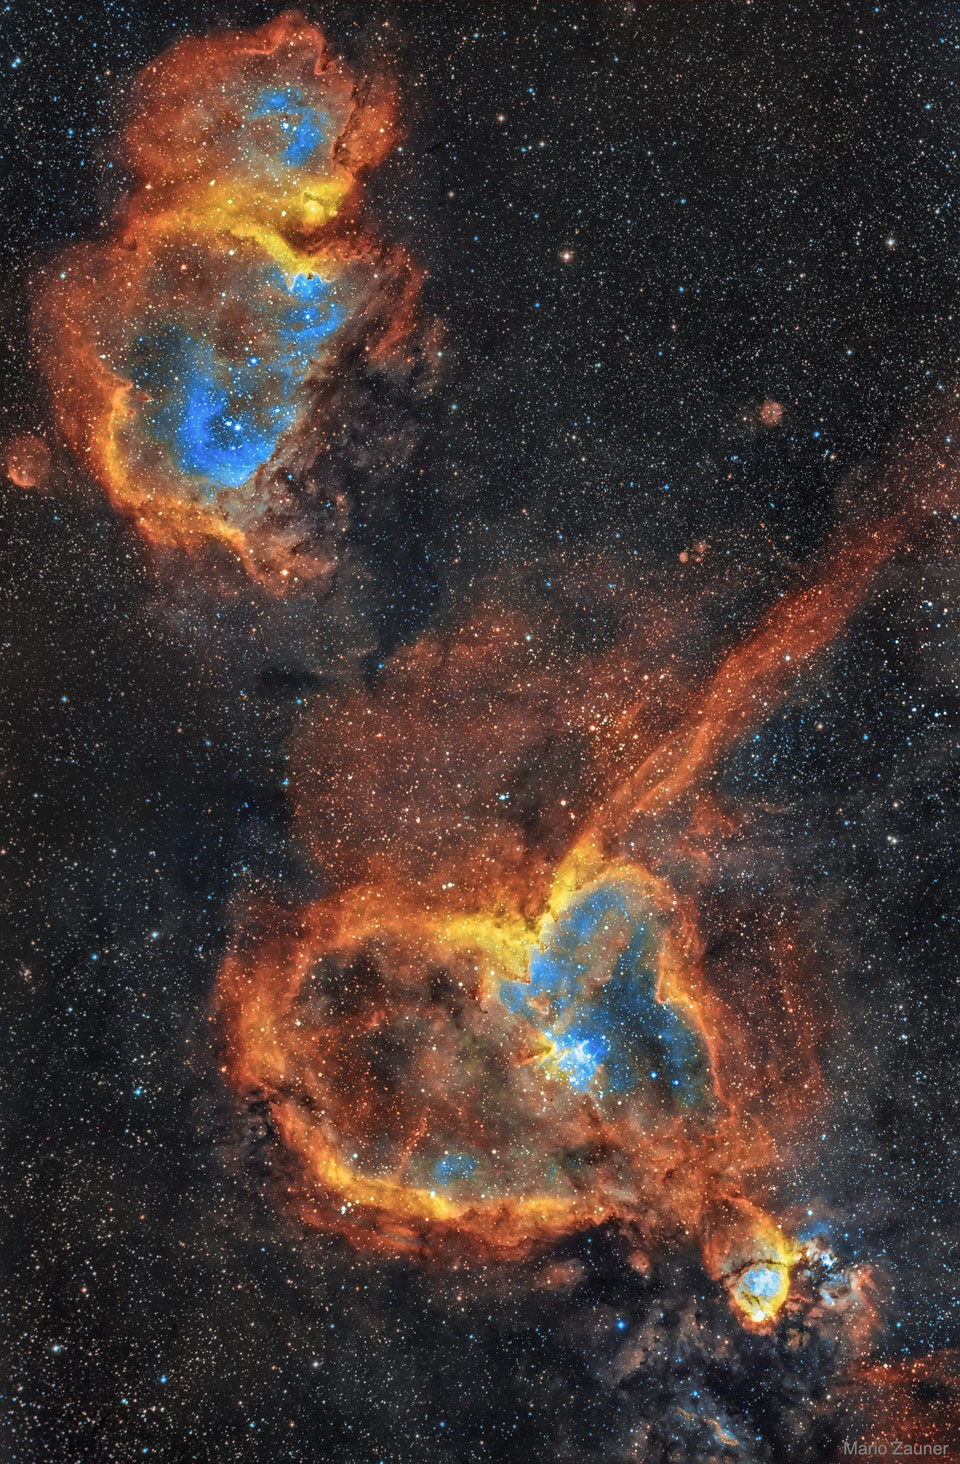

Fecha:  2018-9-15
Title:  Mont Blanc, Meteor, and Milky Way


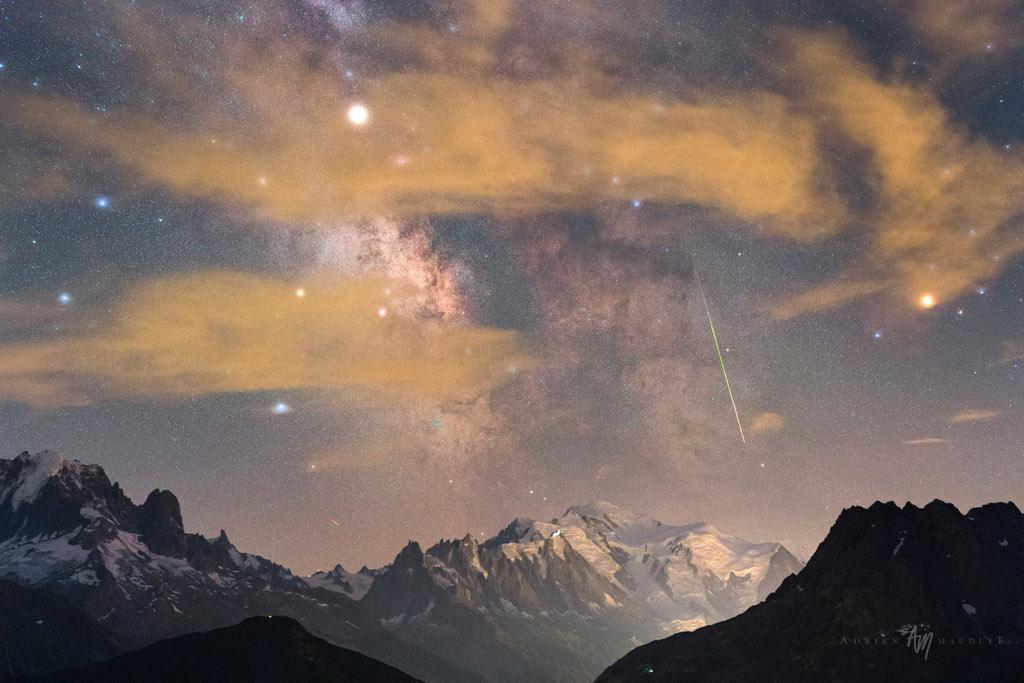

Fecha:  2019-10-10
Title:  Mid-Air Meteor and Milky Way


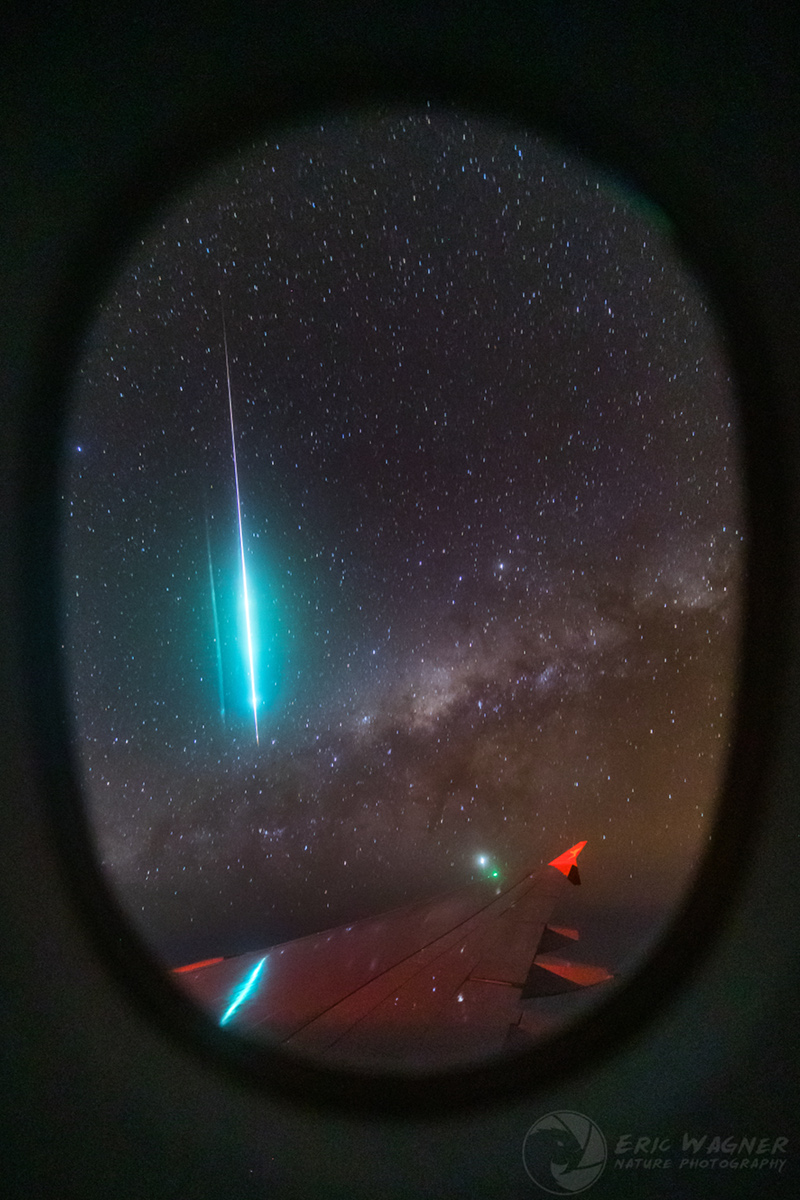

Fecha:  2018-3-27
Title:  Mars Between Nebulas


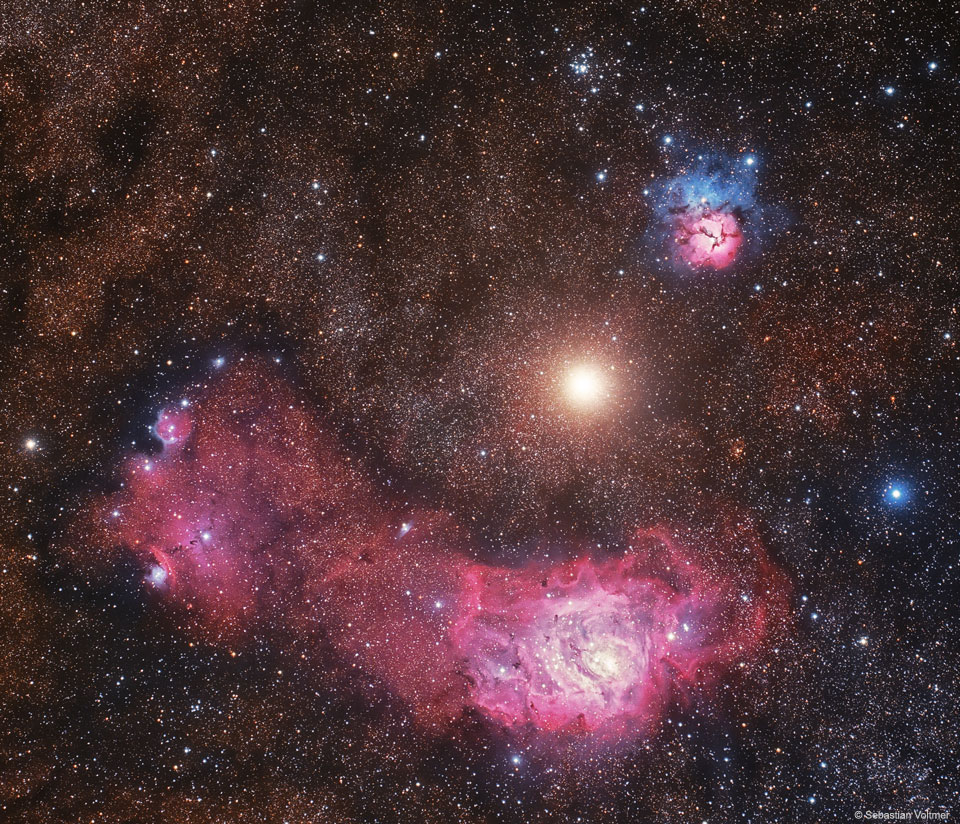

Fecha:  2019-11-4
Title:  Near the Center of the Lagoon Nebula


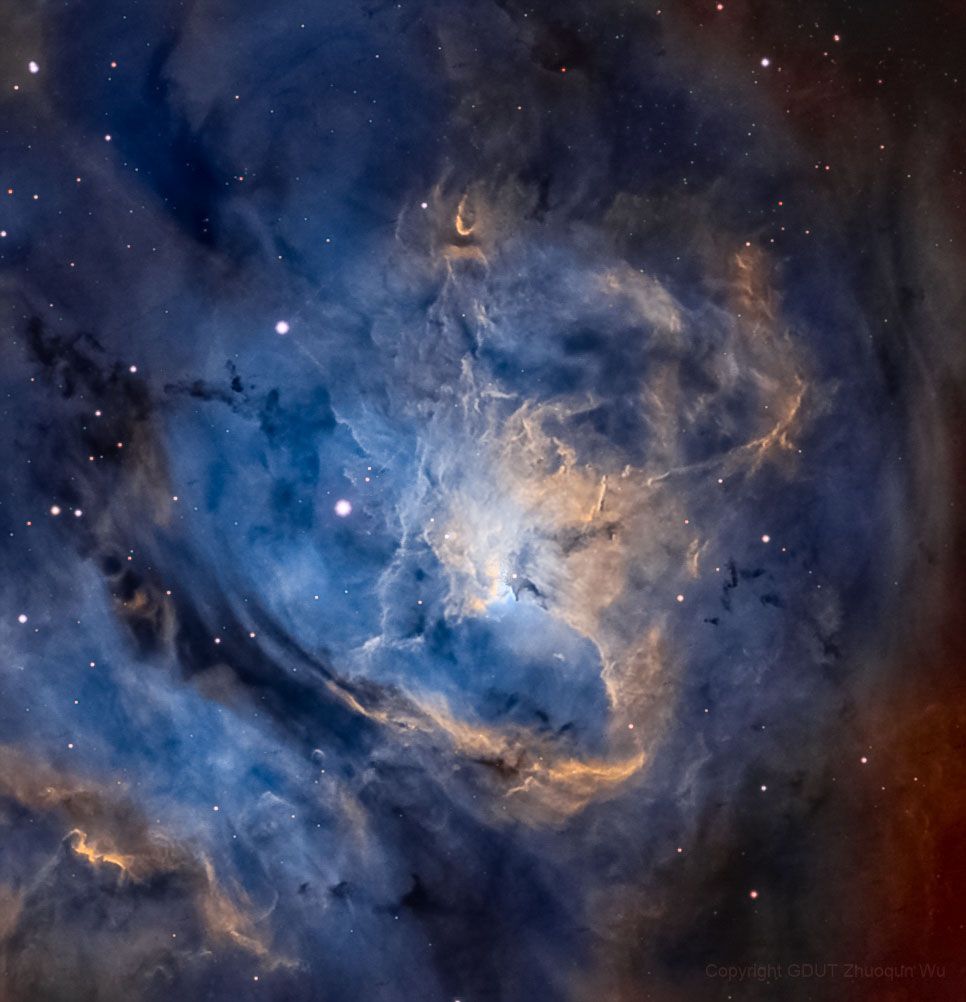

Fecha:  2018-12-9
Title:  Aurora Shimmer, Meteor Flash


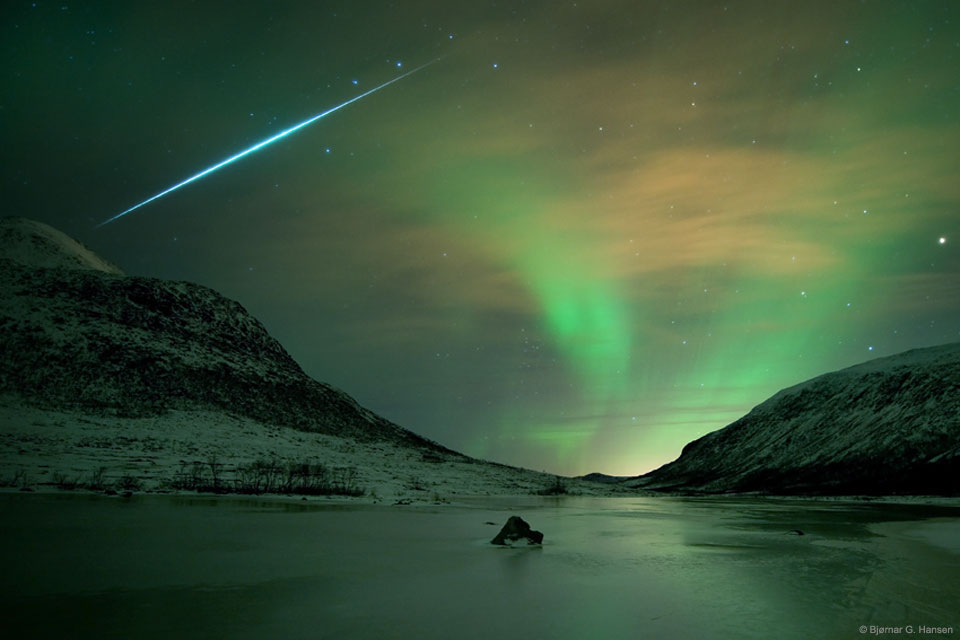

Fecha:  2015-8-14
Title:  Comet Dust over Enchanted Rock


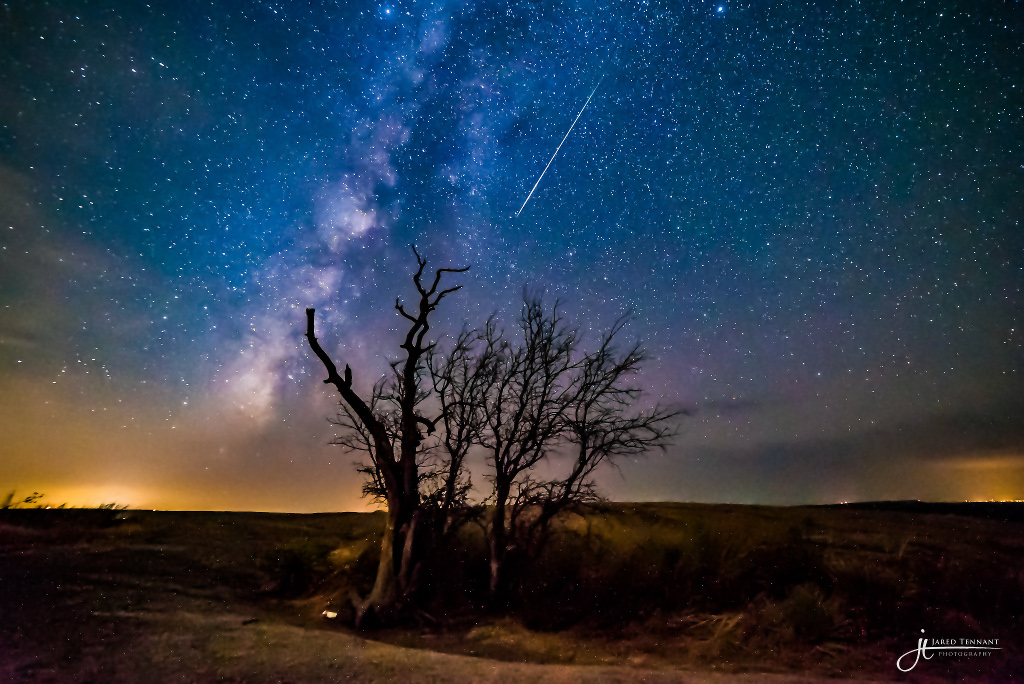

In [15]:
import requests
from IPython.display import Image
from IPython.display import display

apikey="lx81PWlSB3UK8oUu3zb2tPn4a30PQf1iEFzL7Psj"
for i in fechas:
    print("Fecha: ",i)
    url="https://api.nasa.gov/planetary/apod?date={}&api_key={}".format(i,apikey)
    r=requests.get(url)
    response=r.json()
    imageurl=response["url"]
    title=response["title"]
    print("Title: ",title)
    display(Image(response["url"], width = 250))